This notebook demonstrates how to do Meanshift to do image segmentation on an image using the [Scikit-Learn](http://scikit-learn.org/stable/) library.

This is the code that accompanies the article at http://www.chioka.in/meanshift-algorithm-for-the-rest-of-us-python/

In [1]:
import warnings

warnings.filterwarnings("ignore")

import numpy as np
from sklearn.cluster import MeanShift, estimate_bandwidth
from sklearn.datasets.samples_generator import make_blobs
from itertools import cycle
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab

%matplotlib inline
pylab.rcParams["figure.figsize"] = 16, 12

We will load in the image and display the original image for reference.

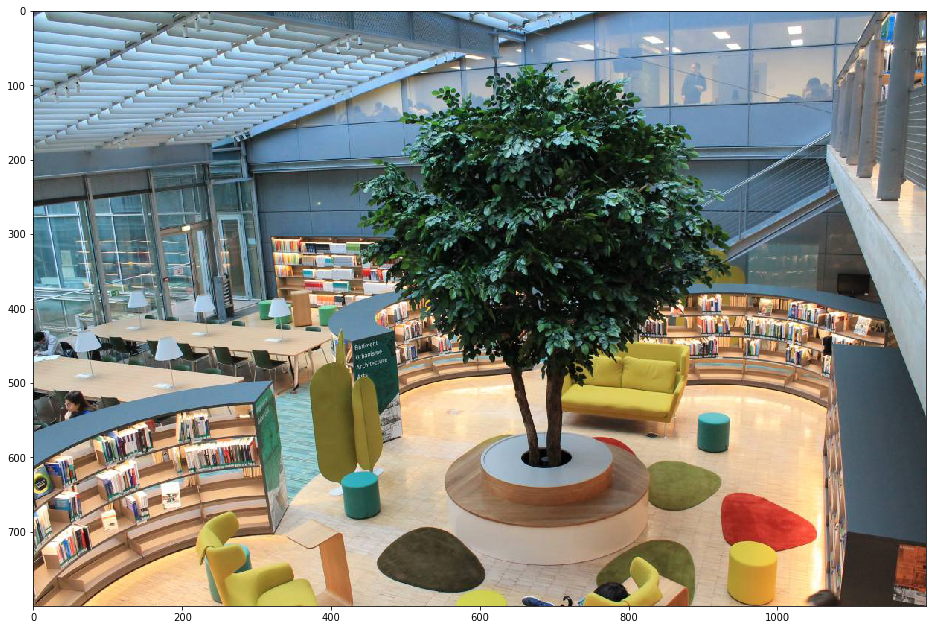

In [2]:
image = Image.open("source.jpg")
image_copy = Image.open("source.jpg")
# Image is (687 x 1025, RGB channels)
image = np.array(image)
image_copy = np.array(image_copy)
original_shape = image.shape

# Flatten image.
X = np.reshape(image, [-1, 3])

plt.imshow(image)

Estimate the kernel bandwidth to use from our image (the datapoints).

In [3]:
bandwidth = estimate_bandwidth(X, quantile=0.1, n_samples=100)
print(bandwidth)

40.32089565024485


Now run Meanshift on the image to do the image segmentation, which is stored in *X*.

In [4]:
ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(X)

MeanShift(bandwidth=40.32089565024485, bin_seeding=True, cluster_all=True,
          max_iter=300, min_bin_freq=1, n_jobs=None, seeds=None)

Print some debug information to get a sense of what is being done. From what we see, this yielded 6 clusters, thus 6 colors. If you re-run this notebook with different parameters, you may find different results.

In [5]:
labels = ms.labels_
print(labels.shape)
cluster_centers = ms.cluster_centers_
print(cluster_centers.shape)

labels_unique = np.unique(labels)
n_clusters_ = len(labels_unique)
print("number of estimated clusters : %d" % n_clusters_)

(960000,)
(6, 3)
number of estimated clusters : 6


In [6]:
segmented_image = np.reshape(
    labels, original_shape[:2]
)  # cluster_centers[np.reshape(labels, original_shape[:2])]  # Just take size, ignore RGB channels.
print(image[0][0])
print(segmented_image[0][0])
# image[np.where(segmented_image == 1)] = np.mean(image[np.where(segmented_image == 1)], axis = 0)

for i in range(n_clusters_):
    image_copy[np.where(segmented_image == i)] = np.mean(
        image[np.where(segmented_image == i)], axis=0
    )

[85 90 67]
4


Now, let's display the segmented image and the original image.

(-0.5, 1199.5, 799.5, -0.5)

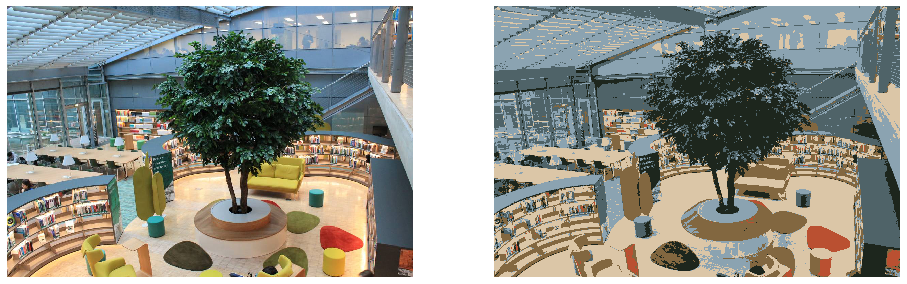

In [7]:
plt.figure(2)
plt.subplot(1, 2, 1)
plt.imshow(image)
plt.axis("off")
plt.subplot(1, 2, 2)
plt.imshow(image_copy)
plt.axis("off")